***Predicting Reoperation after Primary Revision of Traumatic Digit Amputation with Machine Learning Models***

Revision of traumatic digit amputation is a common method of treatment immediately following injury. For some, a secondary revision amputation may be required to address neuroma, cosmetic, infection, or soft tissue concerns. Previous studies utilized regression analyses to identify mechanism of injury and work relation as being significant risk factors for secondary revision. The purpose of this study was to train and validate machine learning techniques to create a model that predicts patient risk for secondary revision amputation.

**Materials and Methods:**
Billing department databases of a Level I trauma center were retrospectively examined for patients with traumatic finger or thumb amputations between January 2010 to December 2015. Inclusion criteria were partial or complete amputations through verdan zones I or II. Variables included age, gender, work-relation, occupation (e.g. skilled, service, student), comorbidities (e.g. diabetes, coronary artery disease, chronic kidney disease), tobacco, and mechanism of injury. Logistic regression analyses and machine learning models including decision-tree, random forests, support vector machines, and K-nearest neighbors were explored with Python using Jupyter Notebooks IDE (Python Software Foundation, Wilmington, Delaware, http://www.jupyter.org).



This notebook contains analysis on the first 15 demographic variables. We use logisitic regression models and decision tree models.

In [2]:
#importing libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the data , setting missing values as . 
train = pd.read_csv('amp_demog.csv', na_values=['.'])

DATA EXPLORATION 


*note: no visualizations in this particular notebook since this contains only the core analysis

In [4]:
#identifying missing values using True and False 
#source: https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/ 
pd.isnull(train)

,record_id,mrn,age,gender,race,date_injury,insured,handedness,work_related,prs_ortho,...,subs_amp_reason___1,subs_amp_reason___2,subs_amp_reason___3,subs_amp_reason___4,subs_amp_reason___5,subs_amp_reason___6,subs_amp_reason___7,subs_amp_reason___8,subs_amp_date,my_first_instrument_complete
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


A total of 572 traumatic finger and thumb amputation patients were identified on retrospective review. 

In [5]:
train.head()

#headers always only have 5 rows ; ensuring that we have all of the columns needed for analysis 

,record_id,mrn,age,gender,race,date_injury,insured,handedness,work_related,prs_ortho,...,subs_amp_reason___1,subs_amp_reason___2,subs_amp_reason___3,subs_amp_reason___4,subs_amp_reason___5,subs_amp_reason___6,subs_amp_reason___7,subs_amp_reason___8,subs_amp_date,my_first_instrument_complete
0,1,10019840248,46.0,1,4.0,4/13/13,0,1,1,2,...,0,0,1,0,0,0,0,0,2/19/14,2
1,2,10020679767,1.5,1,1.0,3/18/13,1,3,2,2,...,0,0,0,1,0,0,0,0,4/26/13,2
2,3,10011412780,62.0,1,4.0,8/14/13,0,1,1,2,...,0,0,0,0,0,0,0,0,NaN,2
3,4,10021831748,28.0,1,1.0,2/19/14,0,1,2,2,...,0,0,0,0,0,0,0,0,NaN,2
4,5,20001130765,55.0,2,1.0,1/17/13,0,1,1,1,...,0,0,0,0,0,0,1,1,5/1/14,2


In [6]:
#identifying data types found in train - which is our raw dataset 
train.dtypes

record_id                          int64
mrn                                int64
age                              float64
gender                             int64
race                             float64
date_injury                       object
insured                            int64
handedness                         int64
work_related                       int64
prs_ortho                          int64
tobacco                            int64
comorbs___1                        int64
comorbs___2                        int64
comorbs___3                        int64
comorbs___4                        int64
comorbs___5                        int64
occupation                         int64
mechanism                          int64
fingers_zones___1                  int64
fingers_zones___2                  int64
fingers_zones___3                  int64
fingers_zones___4                  int64
fingers_zones___5                  int64
fingers_zones___6                  int64
fingers_zones___

In [7]:
#now looking to see how many values there are and how many missing values we have (another method) just to ensure 
#that we only use the values we need for analysis
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Columns: 137 entries, record_id to my_first_instrument_complete
dtypes: float64(5), int64(129), object(3)
memory usage: 612.3+ KB


DATA CLEANING 

In [8]:
#drop missing values
train.drop('init_surg_date',axis=1,inplace=True)
train.drop('init_surg_type',axis=1,inplace=True)
train.drop('replant_success',axis=1,inplace=True)
train.drop('subs_amp_date',axis=1,inplace=True)
train.drop('date_injury',axis=1,inplace=True)
train.drop('replant_ed',axis=1,inplace=True)
train.drop('mrn', axis=1,inplace=True)

#column / variable to drop
#axis = 1 means drop the columns which contain missing values 
#inplace = true means dop operation inplace and return None ; when inplace=true then the data is renamed
#in place (returns nothing)
#when inplcae = false then performs the operation and returns a copy of the obejct
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html 


In [9]:
train.drop('my_first_instrument_complete',axis=1,inplace=True)
train.drop('record_id',axis=1,inplace=True)
train.drop('fingers_zones___1', axis=1,inplace=True)
train.drop('fingers_zones___2', axis=1,inplace=True)
train.drop('fingers_zones___3', axis=1,inplace=True)
train.drop('fingers_zones___4', axis=1,inplace=True)
train.drop('fingers_zones___5', axis=1,inplace=True)
train.drop('fingers_zones___6', axis=1,inplace=True)
train.drop('fingers_zones___7', axis=1,inplace=True)
train.drop('fingers_zones___8', axis=1,inplace=True)
train.drop('fingers_zones___9', axis=1,inplace=True)
train.drop('fingers_zones___10', axis=1,inplace=True)
train.drop('fingers_zones___11', axis=1,inplace=True)
train.drop('fingers_zones___12', axis=1,inplace=True)
train.drop('fingers_zones___13', axis=1,inplace=True)
train.drop('fingers_zones___14', axis=1,inplace=True)
train.drop('fingers_zones___15', axis=1,inplace=True)
train.drop('fingers_zones___16', axis=1,inplace=True)
train.drop('fingers_zones___17', axis=1,inplace=True)
train.drop('fingers_zones___18', axis=1,inplace=True)
train.drop('fingers_zones___19', axis=1,inplace=True)
train.drop('fingers_zones___20', axis=1,inplace=True)
train.drop('revision_amp_ed', axis=1,inplace=True)
#train.drop('init_surg_type', axis=1,inplace=True)
train.drop('replant_finger___1', axis=1,inplace=True)
train.drop('replant_finger___2', axis=1,inplace=True)
train.drop('replant_finger___3', axis=1,inplace=True)
train.drop('replant_finger___4', axis=1,inplace=True)
train.drop('replant_finger___5', axis=1,inplace=True)
train.drop('replant_finger___6', axis=1,inplace=True)
train.drop('replant_finger___7', axis=1,inplace=True)
train.drop('replant_finger___8', axis=1,inplace=True)
train.drop('replant_finger___9', axis=1,inplace=True)
train.drop('replant_finger___10', axis=1,inplace=True)
#train.drop('replant_success', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___1', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___2', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___3', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___4', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___5', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___6', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___7', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___8', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___9', axis=1,inplace=True)
train.drop('init_surg_amp_fingers___10', axis=1,inplace=True)
train.drop('subs_amp_reason___1', axis=1,inplace=True)
train.drop('subs_amp_reason___2', axis=1,inplace=True)
train.drop('subs_amp_reason___3', axis=1,inplace=True)
train.drop('subs_amp_reason___4', axis=1,inplace=True)
train.drop('subs_amp_reason___5', axis=1,inplace=True)
train.drop('subs_amp_reason___6', axis=1,inplace=True)
train.drop('subs_amp_reason___7', axis=1,inplace=True)

In [10]:
train.drop('replant_type_revasc___1', axis=1,inplace=True)
train.drop('replant_type_revasc___2', axis=1,inplace=True)
train.drop('primary_rev_or___1', axis=1,inplace=True)
train.drop('primary_rev_or___2', axis=1,inplace=True)
train.drop('primary_rev_or___3', axis=1,inplace=True)
train.drop('primary_rev_or___4', axis=1,inplace=True)
train.drop('primary_rev_or___5', axis=1,inplace=True)
train.drop('primary_rev_or___6', axis=1,inplace=True)
train.drop('primary_rev_or___7', axis=1,inplace=True)
train.drop('primary_rev_or___8', axis=1,inplace=True)
train.drop('primary_rev_or___9', axis=1,inplace=True)
train.drop('primary_rev_or___10', axis=1,inplace=True)
train.drop('primary_rev_or___11', axis=1,inplace=True)
train.drop('primary_rev_or___12', axis=1,inplace=True)
train.drop('primary_rev_or___13', axis=1,inplace=True)
train.drop('primary_rev_or___14', axis=1,inplace=True)
train.drop('primary_rev_or___15', axis=1,inplace=True)
train.drop('primary_rev_or___16', axis=1,inplace=True)
train.drop('primary_rev_or___17', axis=1,inplace=True)
train.drop('primary_rev_or___18', axis=1,inplace=True)
train.drop('primary_rev_or___19', axis=1,inplace=True)
train.drop('primary_rev_or___20', axis=1,inplace=True)
train.drop('level_secondary_revision___1', axis=1,inplace=True)
train.drop('level_secondary_revision___2', axis=1,inplace=True)
train.drop('level_secondary_revision___3', axis=1,inplace=True)
train.drop('level_secondary_revision___4', axis=1,inplace=True)
train.drop('level_secondary_revision___5', axis=1,inplace=True)
train.drop('level_secondary_revision___6', axis=1,inplace=True)
train.drop('level_secondary_revision___7', axis=1,inplace=True)
train.drop('level_secondary_revision___8', axis=1,inplace=True)
train.drop('level_secondary_revision___9', axis=1,inplace=True)
train.drop('level_secondary_revision___10', axis=1,inplace=True)
train.drop('level_secondary_revision___11', axis=1,inplace=True)
train.drop('level_secondary_revision___12', axis=1,inplace=True)
train.drop('level_secondary_revision___13', axis=1,inplace=True)
train.drop('level_secondary_revision___14', axis=1,inplace=True)
train.drop('level_secondary_revision___15', axis=1,inplace=True)
train.drop('level_secondary_revision___16', axis=1,inplace=True)
train.drop('level_secondary_revision___17', axis=1,inplace=True)
train.drop('level_secondary_revision___18', axis=1,inplace=True)
train.drop('level_secondary_revision___19', axis=1,inplace=True)
train.drop('level_secondary_revision___20', axis=1,inplace=True)
train.drop('replant_zone___1', axis=1,inplace=True)
train.drop('replant_zone___2', axis=1,inplace=True)
train.drop('replant_zone___3', axis=1,inplace=True)
train.drop('replant_zone___4', axis=1,inplace=True)
train.drop('replant_zone___5', axis=1,inplace=True)
train.drop('replant_zone___6', axis=1,inplace=True)
train.drop('replant_zone___7', axis=1,inplace=True)
train.drop('replant_zone___8', axis=1,inplace=True)
train.drop('replant_zone___9', axis=1,inplace=True)
train.drop('replant_zone___10', axis=1,inplace=True)
train.drop('replant_zone___11', axis=1,inplace=True)
train.drop('replant_zone___12', axis=1,inplace=True)
train.drop('replant_zone___13', axis=1,inplace=True)
train.drop('replant_zone___14', axis=1,inplace=True)
train.drop('replant_zone___15', axis=1,inplace=True)
train.drop('replant_zone___16', axis=1,inplace=True)
train.drop('replant_zone___17', axis=1,inplace=True)
train.drop('replant_zone___18', axis=1,inplace=True)
train.drop('replant_zone___19', axis=1,inplace=True)
train.drop('replant_zone___20', axis=1,inplace=True)
train.drop('subs_amp_reason___8', axis=1,inplace=True)

In [11]:
#train["handedness"] = train["handedness"].astype('category
#only shows up as 5 bec ur only showing the head duh

In [12]:
train.dtypes

age             float64
gender            int64
race            float64
insured           int64
handedness        int64
work_related      int64
prs_ortho         int64
tobacco           int64
comorbs___1       int64
comorbs___2       int64
comorbs___3       int64
comorbs___4       int64
comorbs___5       int64
occupation        int64
mechanism         int64
or                int64
subs_rev_amp      int64
dtype: object

In [13]:
#pd.get_dummies(train, columns=["handedness","work_related","prs_ortho","tobacco","occupation","mechanism","my_first_instrument_complete"], prefix=["handedness","work_related","prs_ortho","tobacco","occupation","mechanism","my_first_inst_comp"]).head()

In [14]:
train.head()
print(len(train))

#ensuring that the cleaned data set still has the same number of rows 

572


This sample was randomly split into training and validation datasets to develop and evaluate the performance of predictive models.  Due to the low prevalence of target outcomes (patients requiring secondary revision amputation), investigators applied case weights to yield a balanced sample to train the model.

In [15]:
#getting dummy variables for those columns that were identified as nominal/categorical
#columns specifies the columns
#prefix specifies what we should be renaming those columns to 
#train specifies the data set
#clean --> setting this as the array name bec i want to use this as the new training data 

clean = pd.get_dummies(train, 
                       columns=["handedness","work_related","prs_ortho","tobacco","occupation","mechanism","race","gender"], 
                       prefix=["handedness","work_related","prs_ortho","tobacco","occupation","mechanism","race","gender"])

To maximize the generalizability of conclusions to all fingertip surgeries, investigators chose not to incorporate data specific to the amputation surgery itself, such as digit/finger location, and instead rely exclusively on patient demographic and clinical information to predict the likelihood of requiring secondary revision amputation.

In [16]:
print(clean)

      age  insured  comorbs___1  comorbs___2  comorbs___3  comorbs___4  \
0    46.0        0            0            0            0            0   
1     1.5        1            0            0            0            0   
2    62.0        0            0            0            1            0   
3    28.0        0            0            0            0            0   
4    55.0        0            0            0            0            0   
5    18.0        0            0            0            0            0   
6    71.0        1            0            0            0            0   
7    52.0        0            0            0            0            0   
8    72.0        1            0            0            0            0   
9    84.0        1            0            0            1            0   
10   44.0        1            0            0            0            0   
11   56.0        1            0            0            0            0   
12   66.0        1            0       

In [17]:
from sklearn.model_selection import train_test_split
#this is splitting matrices into random train and test subsets 

#sklearn.model_selection.train_test_split(*arrays, **options)
#*arrays : sequence of indexables with same length / shape[0]
#model_selection module from http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 


In [18]:
clean.head()

,age,insured,comorbs___1,comorbs___2,comorbs___3,comorbs___4,comorbs___5,or,subs_rev_amp,handedness_1,...,mechanism_7,mechanism_8,race_1.0,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0,gender_1,gender_2
0,46.0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
1,1.5,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,62.0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,28.0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,55.0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [19]:
X2 = clean.drop('subs_rev_amp', axis=1)
Y2 = clean['subs_rev_amp']

X_train, X_test, y_train, y_test = train_test_split(X2, Y2,
                                                    test_size=0.50, random_state=101)

from sklearn.tree import DecisionTreeClassifier

Y2.head()
#clean.head()
clean.drop('subs_rev_amp', axis=1).head()

,age,insured,comorbs___1,comorbs___2,comorbs___3,comorbs___4,comorbs___5,or,handedness_1,handedness_2,...,mechanism_7,mechanism_8,race_1.0,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0,gender_1,gender_2
0,46.0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
1,1.5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,62.0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3,28.0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,55.0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
#making sure that the dataframe we are training has the same number of rows as raw

print(len(clean))

572


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_leaf=25, class_weight='balanced')
#tried this on min sample leaf size 25 and 50
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
y_pred = dtree.predict(X_test)
 
#print(y_train2)

METHOD 2: USING DECISION TREES

One major limitation of regression models in a predictive context is their inability to effectively model nonlinear interactions between variables. Machine Learning (ML) algorithms, which can accommodate such interactions have demonstrated superior predictive accuracy in many contexts.  Investigators evaluated the potential for applying several classes of ML algorithms to the clinical data, and chose to focus on decision-tree based models due to their clinical interpretability and relatively strong performance in small samples.

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#compute model performance

print(classification_report(y_test,y_pred))


acc = accuracy_score(y_pred, y_test)
print(acc)

#acc2 = accuracy_score(y_pred2, y_test2)
#print(acc2)
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 
#accuracy classificatin score
#subset accuracy: the set of labels predicted for a sample must
#exactly match the corresponding set of labels in y_true.

conf = confusion_matrix(y_test,y_pred)
print(conf)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



#FOR THE F SCORE WARNING SEE THIS: https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi?rq=1

             precision    recall  f1-score   support

          0       0.88      0.75      0.81       251
          1       0.14      0.29      0.19        35

avg / total       0.79      0.69      0.73       286

0.6923076923076923
[[188  63]
 [ 25  10]]


Predicted,0,1,All
True,,,
0,188,63,251
1,25,10,35
All,213,73,286


In [24]:
#using graphviz to visualize the tree (DECISION TREE WITH FIRST 15 DEMOGRAPHIC VARS)
import graphviz as gv

In [25]:
print(dtree)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [26]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
import graphviz 

#https://stackoverflow.com/questions/36979421/how-can-i-use-conda-to-install-pydotplus 

#clean.drop('subs_rev_amp', axis=1).head()
 
features = list(clean.columns[0:])
print(features) 

features2 = features.remove('subs_rev_amp')
print(features2)

['age', 'insured', 'comorbs___1', 'comorbs___2', 'comorbs___3', 'comorbs___4', 'comorbs___5', 'or', 'subs_rev_amp', 'handedness_1', 'handedness_2', 'handedness_3', 'work_related_1', 'work_related_2', 'work_related_3', 'prs_ortho_1', 'prs_ortho_2', 'tobacco_1', 'tobacco_2', 'tobacco_3', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_9', 'occupation_10', 'occupation_12', 'occupation_13', 'mechanism_1', 'mechanism_2', 'mechanism_3', 'mechanism_4', 'mechanism_5', 'mechanism_6', 'mechanism_7', 'mechanism_8', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'race_6.0', 'gender_1', 'gender_2']
None


In [27]:
demog_features = ['age', 'insured', 'comorbs___1', 'comorbs___2', 'comorbs___3', 'comorbs___4', 'comorbs___5', 'or', 'handedness_1', 'handedness_2', 'handedness_3', 'work_related_1', 'work_related_2', 'work_related_3', 'prs_ortho_1', 'prs_ortho_2', 'tobacco_1', 'tobacco_2', 'tobacco_3', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_9', 'occupation_10', 'occupation_12', 'occupation_13', 'mechanism_1', 'mechanism_2', 'mechanism_3', 'mechanism_4', 'mechanism_5', 'mechanism_6', 'mechanism_7', 'mechanism_8', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'race_6.0', 'gender_1', 'gender_2']

print(demog_features)

demog_features = list(demog_features)

['age', 'insured', 'comorbs___1', 'comorbs___2', 'comorbs___3', 'comorbs___4', 'comorbs___5', 'or', 'handedness_1', 'handedness_2', 'handedness_3', 'work_related_1', 'work_related_2', 'work_related_3', 'prs_ortho_1', 'prs_ortho_2', 'tobacco_1', 'tobacco_2', 'tobacco_3', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_9', 'occupation_10', 'occupation_12', 'occupation_13', 'mechanism_1', 'mechanism_2', 'mechanism_3', 'mechanism_4', 'mechanism_5', 'mechanism_6', 'mechanism_7', 'mechanism_8', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'race_6.0', 'gender_1', 'gender_2']


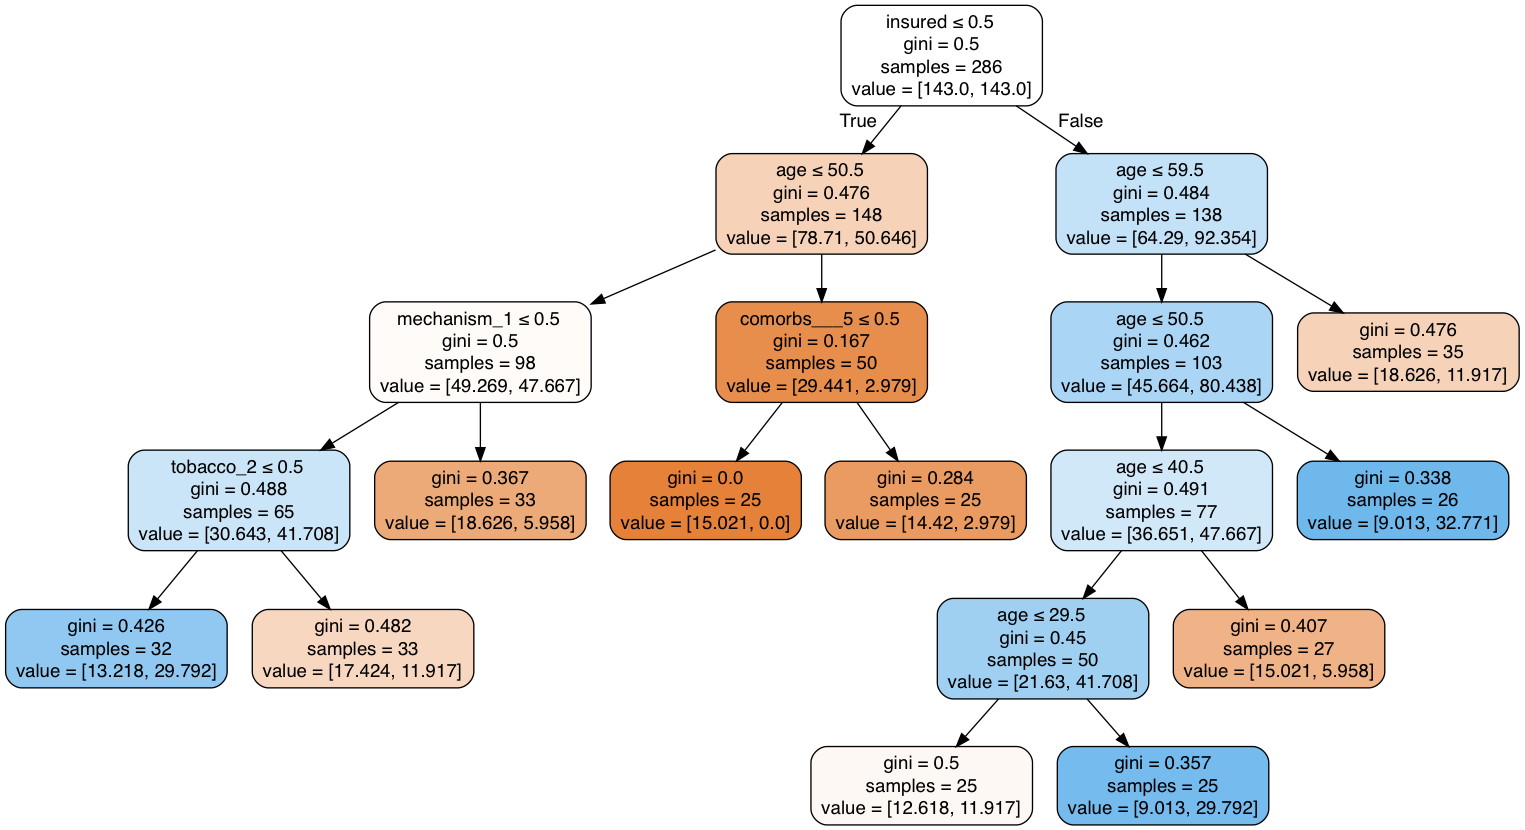

In [28]:
dot_data = StringIO()  
export_graphviz(dtree, 
                out_file=dot_data,
                feature_names=demog_features,
                filled=True,
                rounded=True,
                proportion=False,
                impurity=True,
                special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  



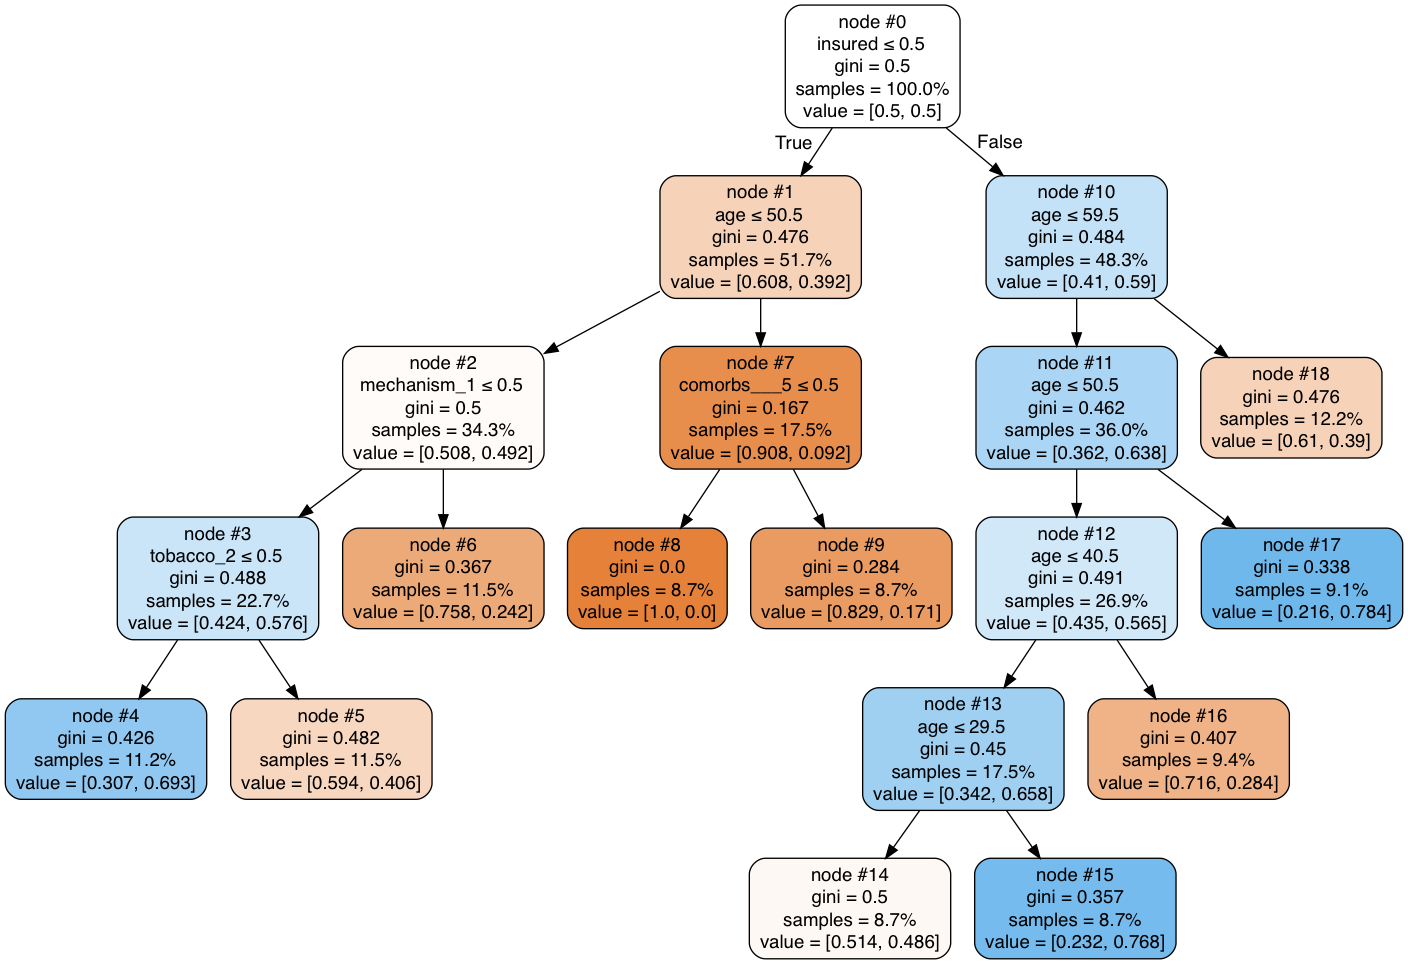

In [29]:
dot_data = StringIO()  
export_graphviz(dtree, 
                out_file=dot_data,
                feature_names=demog_features,
                filled=True,
                rounded=True,
                proportion=True,
                impurity=True,
                node_ids=True,
                special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

#now doesnt include subsrevamp 

Investigators initially trained a series of decision trees, which use statistical criteria to split the population into subgroups based on risk.  Decision-tree models demonstrated demonstrated superior predictive accuracy, yielding accurate predictions (69.2%) of the time compared to 61.9% for logistic models.  Notably, decision trees identified uninsured patients suffering from crush injuries and/or over the age of 50 as having anomalously high risk for requiring revision amputations.


Investigators subsequently trained and evaluated random forest models using the sample data  Random forests use aggregated ensembles of decision trees and typically outperform single decision trees in most contexts.  Random forest models did not demonstrate substantial increases in predictive accuracy over the individual decision trees in our sample, which is likely due to the limited sample size, as random forests rely on data-intensive bootstrap resampling.  However, the random forest algorithms yielded useful rankings of variable importance that corroborated our other empirical results (Figure 2)

In [30]:
features = list(clean.columns[0:])
features

#note that X2 is defined as clean columns but dropping subs_rev_amp

['age',
 'insured',
 'comorbs___1',
 'comorbs___2',
 'comorbs___3',
 'comorbs___4',
 'comorbs___5',
 'or',
 'subs_rev_amp',
 'handedness_1',
 'handedness_2',
 'handedness_3',
 'work_related_1',
 'work_related_2',
 'work_related_3',
 'prs_ortho_1',
 'prs_ortho_2',
 'tobacco_1',
 'tobacco_2',
 'tobacco_3',
 'occupation_1',
 'occupation_2',
 'occupation_3',
 'occupation_4',
 'occupation_5',
 'occupation_6',
 'occupation_7',
 'occupation_9',
 'occupation_10',
 'occupation_12',
 'occupation_13',
 'mechanism_1',
 'mechanism_2',
 'mechanism_3',
 'mechanism_4',
 'mechanism_5',
 'mechanism_6',
 'mechanism_7',
 'mechanism_8',
 'race_1.0',
 'race_2.0',
 'race_3.0',
 'race_4.0',
 'race_5.0',
 'race_6.0',
 'gender_1',
 'gender_2']

METHOD 1: LOGISTIC REGRESSION

To provide a baseline for comparison, investigators initially trained a logistic regression model to predict the binary outcome of a patient requiring secondary amputation revision.  

In [31]:
#training the model

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)


#fit(X, y, sample_weight=None
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 


#predict y using x test
y_pred = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#compute model performance

print(classification_report(y_test,y_pred))


acc = accuracy_score(y_pred, y_test)
print(acc)

#acc2 = accuracy_score(y_pred2, y_test2)
#print(acc2)
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 
#accuracy classificatin score
#subset accuracy: the set of labels predicted for a sample must
#exactly match the corresponding set of labels in y_true.

conf = confusion_matrix(y_test,y_pred)
print(conf)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

             precision    recall  f1-score   support

          0       0.89      0.65      0.75       251
          1       0.14      0.43      0.22        35

avg / total       0.80      0.62      0.68       286

0.6188811188811189
[[162  89]
 [ 20  15]]


Predicted,0,1,All
True,,,
0,162,89,251
1,20,15,35
All,182,104,286


In [33]:
#Getting the coefficients and the parameters that were used in the model

print ('Estimated intercept coefficeint:', logmodel.intercept_)
#print('Model intercept:', logmodel.intercept_)
print('Number of coefficients:', len(logmodel.coef_))

Estimated intercept coefficeint: [0.24544781]
Number of coefficients: 1


In [41]:
print((demog_features, logmodel.coef_))

dfnames = pd.DataFrame(data=demog_features)
dfcoeff = pd.DataFrame(data=logmodel.coef_)

#xy = dfnames.append(dfcoeff)

#xy

#print(xy)
#f_list = pd.DataFrame(
  #  {'Column Names': dfnames,
  #   'Coefficient Values': dfcoeff
  #  } index][0])


#percentile_list = pd.DataFrame(np.columns([dfnames, dfcoeff]), 
                             #columns=['lst1Title', 'lst2Title'])

(['age', 'insured', 'comorbs___1', 'comorbs___2', 'comorbs___3', 'comorbs___4', 'comorbs___5', 'or', 'handedness_1', 'handedness_2', 'handedness_3', 'work_related_1', 'work_related_2', 'work_related_3', 'prs_ortho_1', 'prs_ortho_2', 'tobacco_1', 'tobacco_2', 'tobacco_3', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_9', 'occupation_10', 'occupation_12', 'occupation_13', 'mechanism_1', 'mechanism_2', 'mechanism_3', 'mechanism_4', 'mechanism_5', 'mechanism_6', 'mechanism_7', 'mechanism_8', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'race_6.0', 'gender_1', 'gender_2'], array([[-0.02011183,  1.06893567, -1.57312968, -0.07442718,  0.10875401,
        -0.34616219,  0.53597853, -0.4800945 ,  0.38703625,  0.36256703,
        -0.50415547,  0.54699117, -0.3996106 ,  0.09806724,  0.05754321,
         0.1879046 ,  0.06230532, -0.43458092,  0.61772341, -0.36274485,
        -0.27270074, -0.33995329,  0.257

METHOD 3: LOGISTIC REGRESSION with recursive feature elimination

To identify the best regression model available, investigators estimated regression models using all available predictive variables, and then refined the model using Recursive Feature Elimination (RFE) and other feature selection algorithms.  The best performing logistic specifications yielded a predictive accuracy of 61.9%

In [35]:
#training the model

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)

rfe = RFE(logmodel, 50)
fit = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)
print(X_train.head())
#fit(X, y, sample_weight=None
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 


#predict y using x test
y_pred = rfe.predict(X_test)



[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
      age  insured  comorbs___1  comorbs___2  comorbs___3  comorbs___4  \
126  65.0        1            0            0            0            0   
78   87.0        1            0            0            1            0   
167  61.0        1            0            0            0            0   
484  70.0        1            0            0            0            0   
342  89.0        1            0            0            0            0   

     comorbs___5  or  handedness_1  handedness_2    ...     mechanism_7  \
126            0   0             1             0    ...               0   
78             1   1         

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#compute model performance

print(classification_report(y_test,y_pred))


acc = accuracy_score(y_pred, y_test)
print(acc)

#acc2 = accuracy_score(y_pred2, y_test2)
#print(acc2)
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 
#accuracy classificatin score
#subset accuracy: the set of labels predicted for a sample must
#exactly match the corresponding set of labels in y_true.

conf = confusion_matrix(y_test,y_pred) 
print(conf)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

             precision    recall  f1-score   support

          0       0.89      0.65      0.75       251
          1       0.14      0.43      0.22        35

avg / total       0.80      0.62      0.68       286

0.6188811188811189
[[162  89]
 [ 20  15]]


Predicted,0,1,All
True,,,
0,162,89,251
1,20,15,35
All,182,104,286


**CONCLUSION:** Tree-based machine learning models yielded the most accurate overall predictions for secondary revision amputation, and substantially outperformed the logistic regression models that are standard practice in this context.

All models consistently identified insurance status, age, gender, mechanism of injury, and smoking status as key predictive features.  However, the tree-based machine learning techniques identified useful variable interactions that were not captured by logistic regression. These results suggest future potential for applying nonlinear techniques from machine learning to more accurately predict clinical outcomes.  Our results also indicate that sample size is a key constraint in the effective application of machine learning models in a clinical context.